## Outliers & Fehler
Analyse von möglichen Fehler und Ausreisser im Dataset

In [1]:
from sklearn.ensemble import GradientBoostingRegressor

import src.package.importer as im
import src.package.ml_helper as ml
import src.package.charts as charts
import src.package.consts as c
import seaborn as sns
import matplotlib.pyplot as plt

# set size of seaborn plots
charts.set_preferences(sns)

# import data
df = im.get_extended_dataset('../package/datasets/full_dataset.csv')
df = im.select_relevant_features(df, additional_features=[c.FIELD_ID])


#### Hohes HNF/GF Verhältnis

In [2]:
extreme_ratios = df[(df[c.FIELD_HNF_GF_RATIO] > 0.8) | (df[c.FIELD_HNF_GF_RATIO] < 0.2)]
print(f'Number values: {extreme_ratios[c.FIELD_ID].count()}')
extreme_ratios

Number values: 24


,nom_usage_main,usage_cluster,nom_facade,area_total_floor_416,area_net_floor_416,area_main_usage,volume_total_416,volume_total_116,num_buildings,num_floors_overground,num_floors_underground,total_expenses,cost_ref_gfs,ratio_hnf_gf,id
315,VERKEHRSBAUTEN__PARKHAEUSER_OBERIRDISCH,HALLEN,NICHT_ISOLIERT_BETON,2138.0,2042.0,1970.0,NaN,5177.0,1,2.0,1.0,1506706.0,1616.0,0.921422,1421
473,SCHULBAUTEN__HOCHSCHULEN_UNIVERSITAETEN,SCHULEN,STAHL_KASSETENWANDFASSADE,502.0,NaN,420.0,NaN,2348.0,1,2.0,0.0,1536596.0,NaN,0.836653,2471
485,NaN,NaN,NaN,502.0,NaN,420.0,NaN,2348.0,1,NaN,0.0,2006000.0,NaN,0.836653,6158
500,SCHUTZBAUTEN__FEUERWEHRGEBAEUDE,BETRIEB,HOLZ_EINFACH,1628.0,NaN,1413.0,6864.0,7450.0,1,2.0,1.0,2940000.0,3213.0,0.867936,2366
578,LAGERBAUTEN__INDUSTRIEHALLEN,HALLEN,GLASSFASSADE_GLASSFASSADE,31770.0,31084.0,27782.0,204580.0,NaN,1,3.0,1.0,40800000.0,39373.0,0.874473,2258
608,VERKEHRSBAUTEN__PARKHAEUSER_UNTERIRDISCH,HALLEN,NICHT_ISOLIERT_BETON,9515.0,9020.0,8413.0,30225.0,NaN,1,2.0,4.0,16821000.0,9017.0,0.884183,1790
611,LAGERBAUTEN__INDUSTRIEHALLEN,HALLEN,HOLZ_EINFACH,11770.0,10974.0,10265.0,123571.0,NaN,1,4.0,0.0,28121260.0,23524.0,0.872133,1808
620,VERKEHRSBAUTEN__STRASSENVERKEHR,BETRIEB,STAHL_KASSETENWANDFASSADE,2635.0,NaN,2133.0,13907.0,16604.0,1,2.0,1.0,NaN,NaN,0.809488,2135
621,WOHNBAUTEN__EFH_REIHEN_MEDIUM,WOHNEN,AUSSENDAEMMUNG_PUTZ_EINFACH,263.0,NaN,226.0,860.0,1074.0,1,3.0,0.0,NaN,NaN,0.859316,2168
623,FREIZEITBAUTEN_SPORTBAUTEN_ERHOLUNGSBAUTEN__TU...,HALLEN,GLASSFASSADE_GLASSFASSADE_DOPPEL,1874.0,1604.0,1572.0,13793.0,NaN,1,1.0,1.0,8248000.0,4566.0,0.838847,2255


#### HNF/GF Ratio Ausreisser

In [3]:
ratio_outliers = ml.get_outliers(df, c.FIELD_HNF_GF_RATIO, factor=2.3)
print(f'Number values: {ratio_outliers[c.FIELD_ID].count()}')
ratio_outliers

Number values: 17


,nom_usage_main,usage_cluster,nom_facade,area_total_floor_416,area_net_floor_416,area_main_usage,volume_total_416,volume_total_116,num_buildings,num_floors_overground,num_floors_underground,total_expenses,cost_ref_gfs,ratio_hnf_gf,id
35,GESUNDHEITSBAUTEN__KRANKENHAEUSER_Logistik,BETRIEB,MASSIVBAU_EINFACH,10370.0,NaN,2336.0,NaN,48320.0,1,2.0,2.0,22263836.0,18694.0,0.225265,806
61,LAGERBAUTEN_PRODUKTIONSBAUTEN,BETRIEB,MASSIVBAU_EINFACH,31315.0,NaN,7585.0,NaN,154975.0,1,4.0,2.0,NaN,NaN,0.242216,893
315,VERKEHRSBAUTEN__PARKHAEUSER_OBERIRDISCH,HALLEN,NICHT_ISOLIERT_BETON,2138.0,2042.0,1970.0,NaN,5177.0,1,2.0,1.0,1506706.0,1616.0,0.921422,1421
500,SCHUTZBAUTEN__FEUERWEHRGEBAEUDE,BETRIEB,HOLZ_EINFACH,1628.0,NaN,1413.0,6864.0,7450.0,1,2.0,1.0,2940000.0,3213.0,0.867936,2366
578,LAGERBAUTEN__INDUSTRIEHALLEN,HALLEN,GLASSFASSADE_GLASSFASSADE,31770.0,31084.0,27782.0,204580.0,NaN,1,3.0,1.0,40800000.0,39373.0,0.874473,2258
608,VERKEHRSBAUTEN__PARKHAEUSER_UNTERIRDISCH,HALLEN,NICHT_ISOLIERT_BETON,9515.0,9020.0,8413.0,30225.0,NaN,1,2.0,4.0,16821000.0,9017.0,0.884183,1790
611,LAGERBAUTEN__INDUSTRIEHALLEN,HALLEN,HOLZ_EINFACH,11770.0,10974.0,10265.0,123571.0,NaN,1,4.0,0.0,28121260.0,23524.0,0.872133,1808
621,WOHNBAUTEN__EFH_REIHEN_MEDIUM,WOHNEN,AUSSENDAEMMUNG_PUTZ_EINFACH,263.0,NaN,226.0,860.0,1074.0,1,3.0,0.0,NaN,NaN,0.859316,2168
720,VERKEHRSBAUTEN__WERKHOEFE,BETRIEB,NICHT_ISOLIERT_BETON,176.0,161.0,161.0,768.0,NaN,1,0.8,0.2,860200.0,736.0,0.914773,1391
787,VERKEHRSBAUTEN__ZOLL,BETRIEB,SICHTBETONFASSADE_BACKSTEIN,792.0,NaN,119.0,2700.0,NaN,1,2.0,0.5,NaN,NaN,0.150253,1454


<AxesSubplot:xlabel='ratio_hnf_gf'>

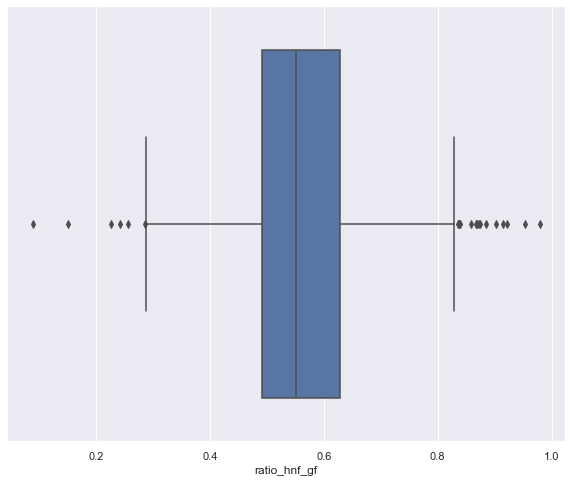

In [4]:
sns.boxplot(x=df[c.FIELD_HNF_GF_RATIO])

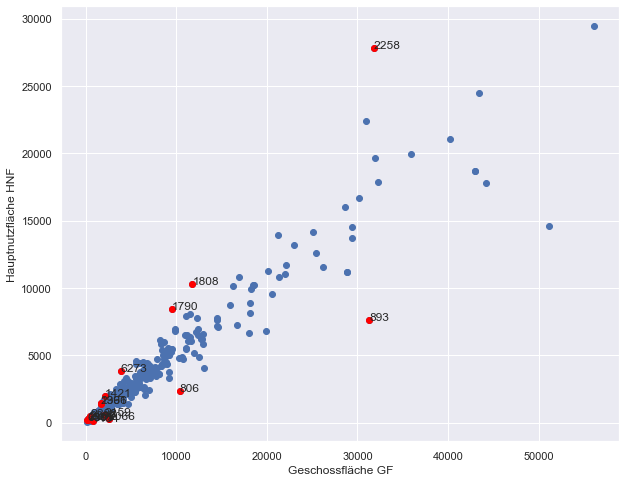

In [5]:
charts.scatter_highlight(df, ratio_outliers, x=c.FIELD_AREA_TOTAL_FLOOR_416, y=c.FIELD_AREA_MAIN_USAGE,
                         x_label=charts.LABEL_GF, y_label=charts.LABEL_HNF, save_label=c.FIELD_HNF_GF_RATIO)

#### HNF Ausreisser

In [6]:
hnf_outliers = ml.get_outliers(df, c.FIELD_AREA_MAIN_USAGE, factor=2.3)
hnf_outliers

,nom_usage_main,usage_cluster,nom_facade,area_total_floor_416,area_net_floor_416,area_main_usage,volume_total_416,volume_total_116,num_buildings,num_floors_overground,num_floors_underground,total_expenses,cost_ref_gfs,ratio_hnf_gf,id
287,BUEROBAUTEN__VOLLAUSBAU,BUERO,GLASSFASSADE_GLASSFASSADE,44190.0,NaN,17767.0,183052.0,212300.0,1,6.0,1.0,205066620.0,22339.0,0.402059,737
456,SCHULBAUTEN__VOLKSSCHULEN,SCHULEN,SICHTBETONFASSADE_BACKSTEIN,28586.0,NaN,16009.0,122708.0,143715.0,4,3.0,1.0,NaN,NaN,0.560029,629
465,WOHNBAUTEN__MFH_MEDIUM,WOHNEN,SICHTBETONFASSADE_BACKSTEIN,32313.0,NaN,17848.0,101056.0,NaN,8,8.0,1.0,71270000.0,15353.0,0.552347,1577
505,WOHNBAUTEN__MFH_MEDIUM,WOHNEN,NaN,31941.0,27430.0,19646.0,98864.0,NaN,8,NaN,0.0,65022360.0,15350.0,0.615072,5978
578,LAGERBAUTEN__INDUSTRIEHALLEN,HALLEN,GLASSFASSADE_GLASSFASSADE,31770.0,31084.0,27782.0,204580.0,NaN,1,3.0,1.0,40800000.0,39373.0,0.874473,2258
590,WOHNBAUTEN__MFH_MEDIUM,WOHNEN,UNKNOWN,35855.0,NaN,19917.0,105163.0,NaN,7,NaN,0.0,56515536.0,20615.0,0.555487,365
606,WOHNBAUTEN__MFH_MEDIUM,WOHNEN,SICHTBETONFASSADE_GIPS,40267.0,31008.0,21038.0,124575.0,NaN,8,7.0,1.0,92800000.0,26535.0,0.522463,1586
669,LAGERBAUTEN__INDUSTRIEHALLEN,HALLEN,HOLZBAU_EINFACH,30940.0,27060.0,22380.0,272000.0,NaN,1,3.0,1.0,29913966.0,41000.0,0.723335,1673
722,SCHULBAUTEN__HOCHSCHULEN_UNIVERSITAETEN,SCHULEN,ZWEISCHALENMAUERWERK_SICHTMAUERWERK,56112.0,50240.0,29437.0,218120.0,NaN,1,4.0,3.0,162200000.0,31171.0,0.524611,1403
747,GESUNDHEITSBAUTEN__UNIVERSITAETSKLINIKEN_BETTE...,GESUNDHEIT,GLASSFASSADE_GLASSFASSADE_DOPPEL,29384.0,25979.0,14503.0,115997.0,NaN,1,5.1,1.0,148800080.0,9272.0,0.493568,3061


In [7]:
description = df[c.FIELD_AREA_MAIN_USAGE].describe(percentiles=[0.75, 0.95])
print(f'75% der Objekte haben eine HNF von weniger als {description["75%"]}')
print(f'95% der Objekte haben eine HNF von weniger als {description["95%"]}')

75% der Objekte haben eine HNF von weniger als 4029.0
95% der Objekte haben eine HNF von weniger als 11506.199999999986


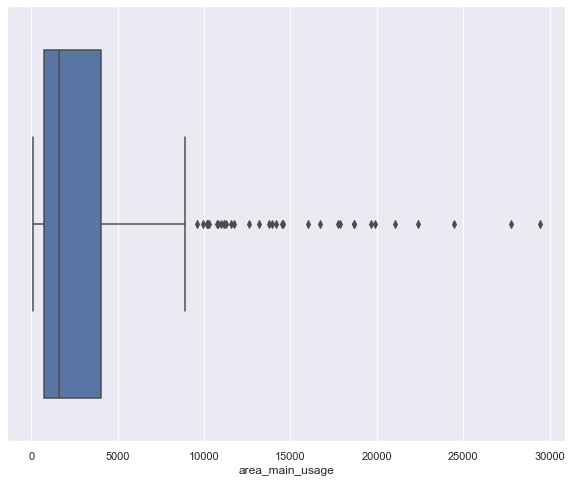

In [8]:
gf = sns.boxplot(x=df[c.FIELD_AREA_MAIN_USAGE])

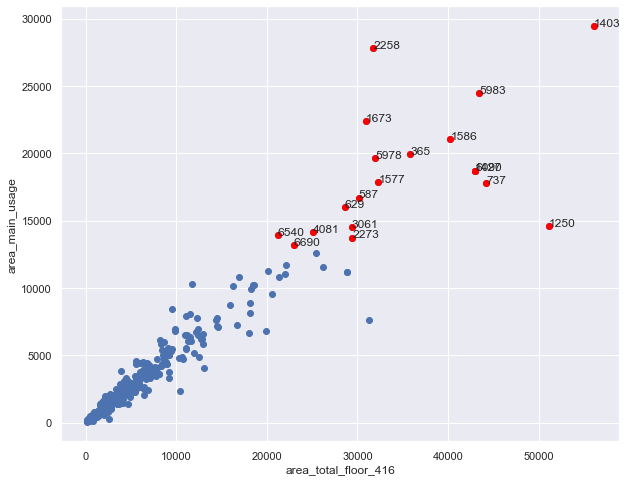

In [9]:
charts.scatter_highlight(df, hnf_outliers, c.FIELD_AREA_TOTAL_FLOOR_416, c.FIELD_AREA_MAIN_USAGE)

#### GF Ausreisser

In [10]:
gf_outliers = ml.get_outliers(df, c.FIELD_AREA_TOTAL_FLOOR_416, factor=3)
gf_outliers

,nom_usage_main,usage_cluster,nom_facade,area_total_floor_416,area_net_floor_416,area_main_usage,volume_total_416,volume_total_116,num_buildings,num_floors_overground,num_floors_underground,total_expenses,cost_ref_gfs,ratio_hnf_gf,id
53,KULTUR__KONGRESS,HALLEN,MASSIVBAU_EDEL,54551.0,NaN,NaN,NaN,270000.0,1,8.0,1.0,122965000.0,9310.0,NaN,2105
151,VERKEHRSBAUTEN__POSTBETRIEBE,TECHNIK,MASSIVBAU_EDEL,41907.0,NaN,NaN,NaN,193352.0,1,6.0,2.0,79661822.0,10382.0,NaN,2852
175,BUEROBAUTEN__EDELROHBAU,BUERO,MASSIVBAU_EDEL,75328.0,NaN,NaN,NaN,315370.0,1,7.0,1.0,147958243.0,20058.0,NaN,359
203,GESUNDHEITSBAUTEN__UNIVERSITAETSKLINIKEN_UNTER...,GESUNDHEIT,MASSIVBAU_EDEL,33950.0,NaN,NaN,NaN,134400.0,1,6.0,3.0,124642000.0,NaN,NaN,521
281,WOHNBAUTEN__MFH_LOW,WOHNEN,SICHTBETONFASSADE_BETONSANDWICHELEMENT,49074.0,NaN,NaN,160000.0,172739.0,28,4.0,1.0,91700000.0,37841.0,NaN,539
287,BUEROBAUTEN__VOLLAUSBAU,BUERO,GLASSFASSADE_GLASSFASSADE,44190.0,NaN,17767.0,183052.0,212300.0,1,6.0,1.0,205066620.0,22339.0,0.402059,737
320,VERWALTUNGSBAUTEN,BUERO,MASSIVBAU_EDEL,36051.0,NaN,NaN,110574.0,122860.0,2,5.0,3.0,87700000.0,11800.0,NaN,2183
353,WOHNBAUTEN__MFH_MEDIUM,WOHNEN,SICHTBETONFASSADE_BACKSTEIN,43559.0,NaN,NaN,144207.0,160230.0,7,9.0,1.0,73100000.0,13647.0,NaN,2165
420,WOHNBAUTEN__MFH_LOW,WOHNEN,HOLZ_EINFACH,60050.0,NaN,NaN,201478.0,219172.0,12,5.0,1.0,84170000.0,32939.0,NaN,647
440,VERKEHRSBAUTEN__FLUG__VERWALTUNG,BUERO,UNKNOWN,36104.0,NaN,NaN,129575.0,154437.0,3,NaN,0.0,89560000.0,NaN,NaN,2090


In [11]:
description = df[c.FIELD_AREA_TOTAL_FLOOR_416].describe(percentiles=[0.75, 0.95])
print(f'75% der Objekte haben eine GF von weniger als {description["75%"]}')
print(f'95% der Objekte haben eine GF von weniger als {description["95%"]}')

75% der Objekte haben eine GF von weniger als 7624.5
95% der Objekte haben eine GF von weniger als 22331.5


<AxesSubplot:xlabel='area_total_floor_416'>

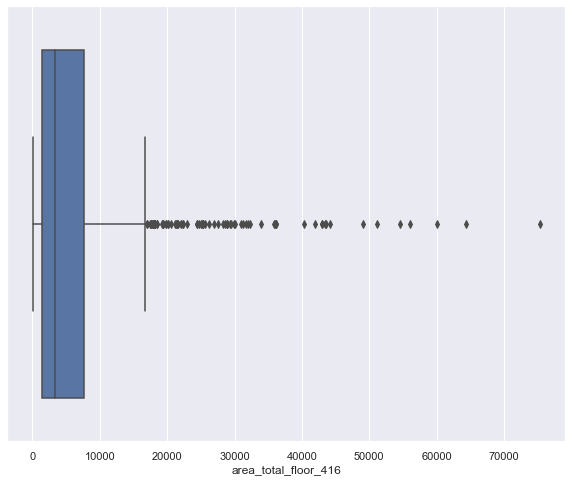

In [12]:
sns.boxplot(x=df[c.FIELD_AREA_TOTAL_FLOOR_416])

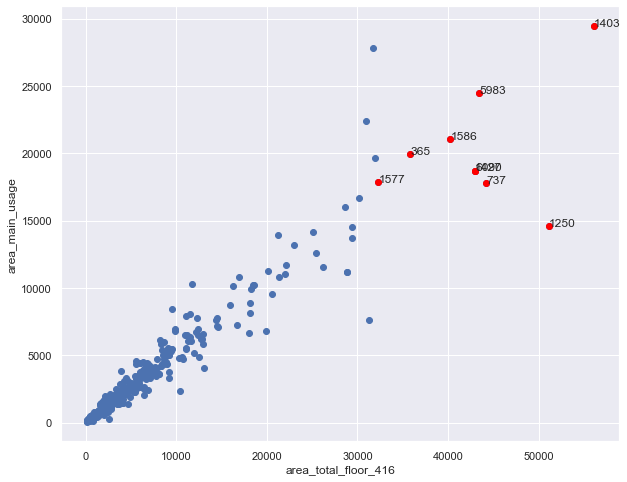

In [13]:
charts.scatter_highlight(df, gf_outliers, c.FIELD_AREA_TOTAL_FLOOR_416, c.FIELD_AREA_MAIN_USAGE)